In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/health-care-data-set-on-heart-attack-possibility/heart.csv


In [2]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report ,accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier


In [3]:
dataset = pd.read_csv('../input/health-care-data-set-on-heart-attack-possibility/heart.csv')
dataset.shape

(303, 14)

In [4]:
dataset.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
dataset=dataset.sample(frac=1,random_state=1)

In [6]:
dataset.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
269,56,1,0,130,283,1,0,103,1,1.6,0,0,3,0
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1


In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 204 to 37
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


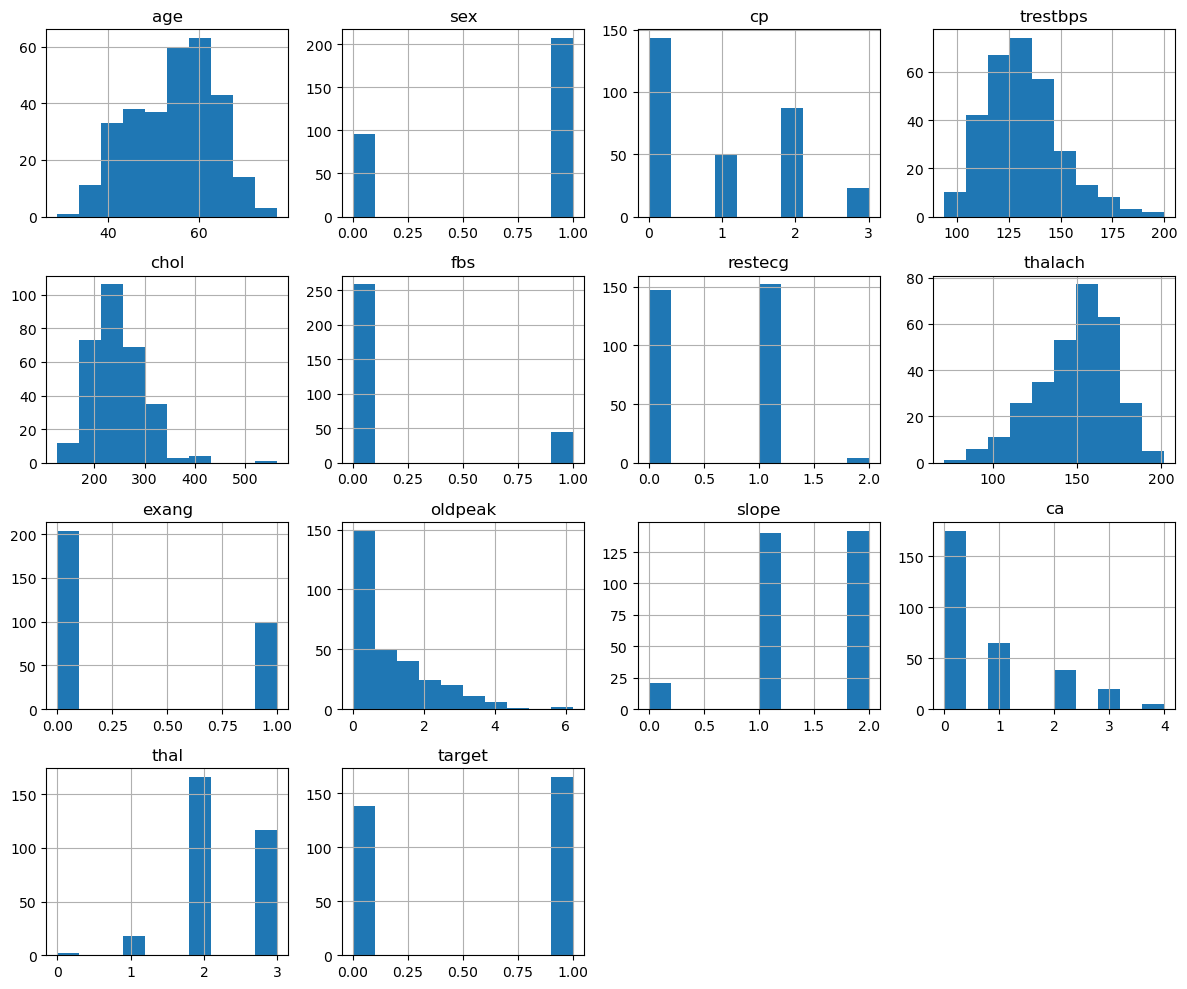

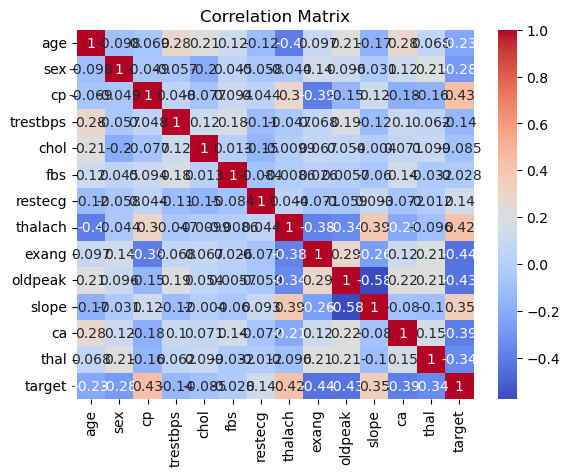

In [9]:


dataset.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


correlation = dataset.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
    



In [10]:
X = dataset.drop("target", axis=1)
Y = dataset['target']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)

In [12]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [13]:
Y_pred = classifier.predict(X_test)

cm = confusion_matrix(Y_test,Y_pred)
print("The confusion matrix is:\n\n",cm)

accuracy = accuracy_score(Y_test,Y_pred)*100
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)


print('\nAccuracy:  '+str(round(accuracy,2))+' %')
print("\nPrecision:", precision)
print("\nRecall:", recall)
print('F1 score: ', f1)

The confusion matrix is:

 [[24 22]
 [13 32]]

Accuracy:  61.54 %

Precision: 0.5925925925925926

Recall: 0.7111111111111111
F1 score:  0.6464646464646464


In [14]:
k = 4
best_features = SelectKBest(score_func=chi2, k=k)
print (X)
X_selected = best_features.fit_transform(X, Y)


selected_feature_indices = best_features.get_support(indices=True)
selected_feature_names = X.columns[selected_feature_indices]


print("Top", k, "selected features:")
print(selected_feature_names)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
204   62    0   0       160   164    0        0      145      0      6.2   
159   56    1   1       130   221    0        0      163      0      0.0   
219   48    1   0       130   256    1        0      150      1      0.0   
174   60    1   0       130   206    0        0      132      1      2.4   
184   50    1   0       150   243    0        0      128      0      2.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
203   68    1   2       180   274    1        0      150      1      1.6   
255   45    1   0       142   309    0        0      147      1      0.0   
72    29    1   1       130   204    0        0      202      0      0.0   
235   51    1   0       140   299    0        1      173      1      1.6   
37    54    1   2       150   232    0        0      165      0      1.6   

     slope  ca  thal  
204      0   3     3  
159      2   0     3  
219      2   2    

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)*100

cm = confusion_matrix(Y_test, Y_pred)

print('\nConfusion Matrix after choosing the top 4 features:\n\n',cm)

print('\nAccuracy after choosing the top 4 features:  '+str(round(accuracy,2)),"%")

precision = precision_score(Y_test, Y_pred)
print("\nPrecision:", precision)


recall = recall_score(Y_test, Y_pred)
print("\nRecall:", recall)



Confusion Matrix after choosing the top 4 features:

 [[29 17]
 [ 7 38]]

Accuracy after choosing the top 4 features:  73.63 %

Precision: 0.6909090909090909

Recall: 0.8444444444444444


In [16]:
top_features =selected_feature_names
X = dataset[top_features]
y = dataset['target']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [17]:

y_pred = rf_classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
print("The confusion matrix is:\n\n",cm)



accuracy = accuracy_score(y_test, y_pred)*100
print("\nAccuracy:"+str(round(accuracy,2)),"%")


precision = precision_score(y_test, y_pred)
print("\nPrecision:", precision)


recall = recall_score(y_test, y_pred)
print("\nRecall:", recall)


The confusion matrix is:

 [[26  4]
 [12 19]]

Accuracy:73.77 %

Precision: 0.8260869565217391

Recall: 0.6129032258064516
